In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import t, f
from statsmodels.tsa.stattools import adfuller


MARTINS BRAGA Arthur

DE SENE ALVIZI Yuri

#### PART 1 - CROSS-SECTION DATA

In [40]:
df = pd.read_csv('textfiles/HPRICE2.raw', delim_whitespace=True, header=None, names=[
                 'price', 'crime', 'nox', 'rooms', 'dist', 'radial', 'proptax', 'stratio', 'lowstat', 'lprice', 'lnox', 'lproptax'])
df.head()

,price,crime,nox,rooms,dist,radial,proptax,stratio,lowstat,lprice,lnox,lproptax
0,24000,0.006,5.38,6.57,4.09,1,29.6,15.3,4.98,10.085810,1.682688,5.690360
1,21599,0.027,4.69,6.42,4.97,2,24.2,17.8,9.14,9.980402,1.545433,5.488938
2,34700,0.027,4.69,7.18,4.97,2,24.2,17.8,4.03,10.454500,1.545433,5.488938
3,33400,0.032,4.58,7.00,6.06,3,22.2,18.7,2.94,10.416310,1.521699,5.402678
4,36199,0.069,4.58,7.15,6.06,3,22.2,18.7,5.33,10.496790,1.521699,5.402678


**1. State the fundamental hypothesis under which the Ordinary Least Squares (OLS) estimators
   are unbiased.**

The fundamental hypothesis under which the Ordinary Least Squares (OLS) estimators are unbiased is that the unobserved variable has a zero mean. So, in other words, to obtain unbiased estimators in a population model such as:

$$
y = \beta_0 + \beta_1 x + u
$$

where $u$ is the error term, also known as the disturbance or unobserved variable, we need to ensure that the expected value of the error term conditioned on the independent variables(s) (X) is equal to the unconditional expected value, which is zero. Mathematically, this can be expressed as: 

$$
E(u|X) = E(u) = 0
$$


**2. Show that under this assumption the OLS estimators are indeed unbiased.**

We can rewrite the following linear model:

$$
y_i = \beta_0 + \beta_1 x_{i1} + ... + \beta_{K} x_{iK} + u_i
$$

in the matrix form, such as:

$$
y = X \beta + u
$$

with $y = (y_1, ..., y_n)'$, $x_k = (x_{1k}, ..., x_{nk})'$, $u=(u_1,...,u_n)'$, $\beta = [\beta_1, ..., \beta_K]'$ and $X = [x_1, ..., x_K]$. So, to derive OLS we need to find $\beta$ that minimizes the following expression:

$$
u' u = (y - X \beta)' (y - X \beta)
$$

In order to do that, we use the fact that the orthogonality condition must be satisfied between X and u, leadind to:

$$
-2 X' (y - X \beta) = 0
$$

Re-arranging considering that $(X'X)$ is inverted, since there is no multi-collinearity:

$$
\hat{\beta} = (X' X)^{-1} X' y
$$

To be unbiased, the estimator above must satisfies:

$$
b(\beta, \hat{\beta}) = E(\hat{\beta}) - \beta = 0
$$

The estimator expectation is given by:

$$
E(\hat{\beta}) = E[(X'X)^{-1} X' (X \beta + u)] = \beta + E(X'u)
$$

So, in order to satisfy $b(\beta, \hat{\beta}) = 0$, the fundamental hypothesis stated in the last item ($E(X'u) = 0$) must be satisfied.




**3. Explain the sample selection bias with an example from the course.**

As discussed in the course, sample selection bias occurs when the sample used in analysis is not representative of the population under study.

For instance, during World War II, a sample of RAF planes returning from war zones was used to determine areas that needed reinforcement. However, this sample excluded planes that were shot down, resulting in a biased sample. Consequently, the conclusion that reinforcing areas with bullet holes was necessary was erroneous. In reality, other areas should have been reinforced since planes with bullet holes were still able to return, while others couldn't.

**4. Explain the omitted variable bias with an example from the course**

Omitted variable bias occurs when a relevant variable is left out of a statistical analysis, leading to biased and unreliable results.

In the example of the effect of fertilizers on agricultural yield in soybean cultivation seen in the course, the yield is influenced by various factors including climate and soil quality. When conducting an experiment by selecting plots of land and applying different amounts of fertilizer, there is a possibility of systematically applying more fertilizer to the plots with better soil quality. This leads to unreliable results due to the omission of the soil quality variable, which is an important factor in determining yield.

**5. Explain the problem of multicollinearity. Is it a problem in this dataset?**

Multicollinearity is a problem that occurs when two or more independent variables are highly correlated. This can lead to imprecise coefficient estimates and higher variances.

To determine if multicollinearity is a problem is this dataset, we calculate the correlation between some variables.

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

threshold = 10  # Threshold for identifying variables with high multicollinearity

# Calculate VIF for each variable
vif = pd.DataFrame()
vif["Variable"] = df.columns
vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

# Identify variables with high multicollinearity
high_vif = vif[vif["VIF"] > threshold]

if len(high_vif) > 0:
    print("Variables with high multicollinearity:")
    print(high_vif)
else:
    print("No variables with high multicollinearity.")
threshold = 0.7

Variables with high multicollinearity:
    Variable           VIF
0      price     94.338157
2        nox   3090.065448
3      rooms    172.657052
4       dist     18.289159
5     radial     21.282301
6    proptax    528.920116
7    stratio    145.243334
8    lowstat     12.750353
9     lprice   7712.626104
10      lnox  10775.833463
11  lproptax  10513.390159


From the results above, this dataset contains some highly correlated coefficients, such as the $radial$ and the $proptax$ with a correlation of 0.91. Therefore, we can state that the multicollinearity is a problem in this dataset.

**6. Create three categories of nox levels (low, medium, high), corresponding to the following percentiles: 0-25%, 26%-74%, 75%-100%**

In [42]:
low, high = df['nox'].quantile([0.25, 0.75])
df['nox_level'] = pd.cut(df['nox'], bins=[df['nox'].min(), low, high, df['nox'].max()], labels=['low', 'medium', 'high'], include_lowest=True)
df.head()

,price,crime,nox,rooms,dist,radial,proptax,stratio,lowstat,lprice,lnox,lproptax,nox_level
0,24000,0.006,5.38,6.57,4.09,1,29.6,15.3,4.98,10.085810,1.682688,5.690360,medium
1,21599,0.027,4.69,6.42,4.97,2,24.2,17.8,9.14,9.980402,1.545433,5.488938,medium
2,34700,0.027,4.69,7.18,4.97,2,24.2,17.8,4.03,10.454500,1.545433,5.488938,medium
3,33400,0.032,4.58,7.00,6.06,3,22.2,18.7,2.94,10.416310,1.521699,5.402678,medium
4,36199,0.069,4.58,7.15,6.06,3,22.2,18.7,5.33,10.496790,1.521699,5.402678,medium


**7. Compute for each category of nox level the average median price and comment on your results**

In [43]:
grouped = df.groupby('nox_level')
average_prices = grouped['price'].mean()
print(average_prices)

nox_level
low       26977.093750
medium    22741.555118
high      17430.653226
Name: price, dtype: float64


| NOx Level | Value |
| --------- | ----- |
| Low       | 26977.09 |
| Medium    | 22741.567 |
| High      | 17430.65 |

These values suggest a descending trend in average median prices as the NOx level increases. This could indicate a negative correlation between NOx levels and housing prices.

**8. Produce a scatter plot with the variable price on the y-axis and the variable nox on the x-axis. Is this a ceteris paribus effect?**

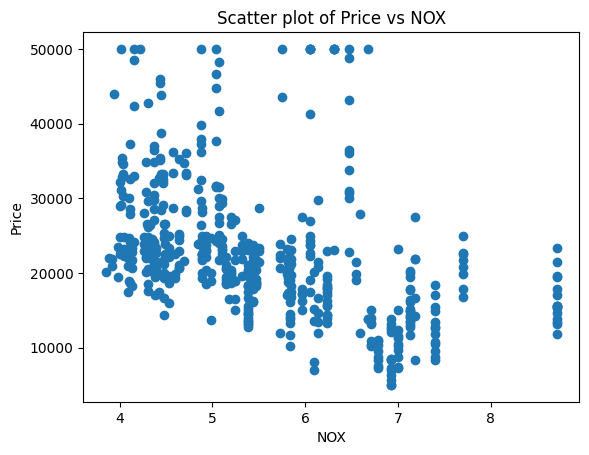

In [44]:
plt.scatter(df['nox'], df['price'])
plt.xlabel('NOX')
plt.ylabel('Price')
plt.title('Scatter plot of Price vs NOX')
plt.show()

When analyzing the graph, it is possible to observe that the average prices increase as NOx levels rise. However, it cannot be asserted that this is a ceteris paribus effect because we do not know if the other variables are held constant, and a scatter plot alone is not sufficient. Moreover, it is possible to see that there are different prices for the same NOx level, indicating the likely presence of other variables influencing the price, which are therefore not constant.

**9. Run a regression of price on a constant, crime, nox, rooms, proptax. Comment on the histogram of the residuals. Interpret all coefficients.**

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     169.6
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           1.06e-91
Time:                        21:12:19   Log-Likelihood:                -5119.6
No. Observations:                 506   AIC:                         1.025e+04
Df Residuals:                     501   BIC:                         1.027e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.868e+04   3215.205     -5.811      0.0

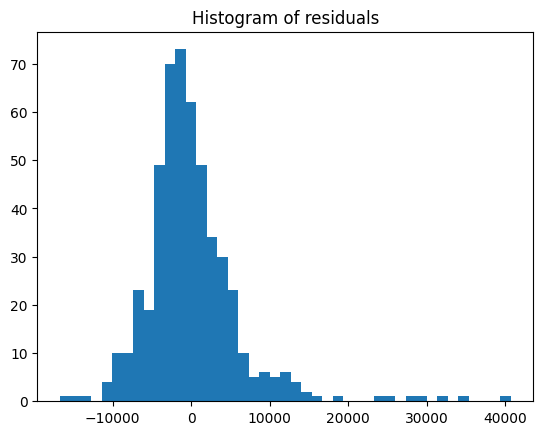

In [45]:
X = df[['crime', 'nox', 'rooms', 'proptax']]
y_9 = df['price']

X = sm.add_constant(X)

model = sm.OLS(y_9, X)
results9 = model.fit()
print(results9.summary())

plt.hist(results9.resid, bins='auto')
plt.title('Histogram of residuals')
plt.show()

The OLS regression results show that all the variables (crime, nox, rooms, proptax) are statistically significant to the price variation as their p-values are less than 0.05.

The coefficients indicate that the price is negatively correlated with crime, nox, and proptax, and positively correlated with rooms.

The histogram of residuals follows a normal distribution. It suggests that the linear regression model might fit for this data.

**10. Run a regression of lprice on a constant, crime, nox, rooms, proptax. Comment on the histogram of the residuals. Interpret all coefficients.**

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     196.9
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          2.50e-101
Time:                        21:12:20   Log-Likelihood:                -26.367
No. Observations:                 506   AIC:                             62.73
Df Residuals:                     501   BIC:                             83.87
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6550      0.137     63.320      0.0

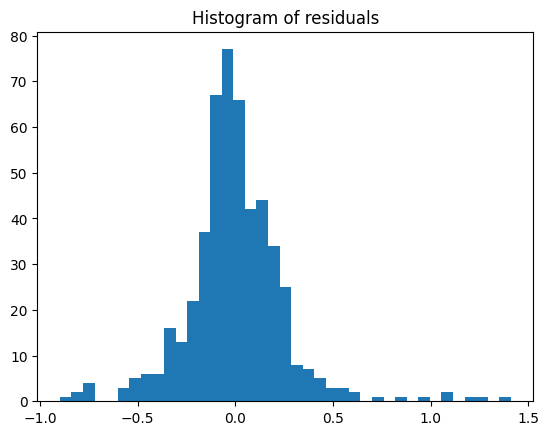

In [46]:
X = df[['crime', 'nox', 'rooms', 'proptax']]
y = df['lprice']

X = sm.add_constant(X)

model = sm.OLS(y, X)
results10 = model.fit()
print(results10.summary())

plt.hist(results10.resid, bins='auto')
plt.title('Histogram of residuals')
plt.show()

The OLS regression results show that all the variables (crime, nox, rooms, proptax) are statistically significant to lprice variation as their p-values are less than 0.05.

The coefficients indicate that the price is negatively correlated with crime, nox, and proptax, and positively correlated with rooms.

The histogram of residuals follows a normal distribution. It suggests that the linear regression model might fit for this data.

Comparing with the results of the previous model, the coefficients are smaller in this model. And the R-squared is higher in this model, which means that this model fits better than the previous one.

**11. Run a regression of lprice on a constant, crime, lnox, rooms, lproptax. Comment on the histogram of the residuals. Interpret all coefficients.**

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     197.4
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          1.77e-101
Time:                        21:12:20   Log-Likelihood:                -26.021
No. Observations:                 506   AIC:                             62.04
Df Residuals:                     501   BIC:                             83.18
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7505      0.253     38.476      0.0

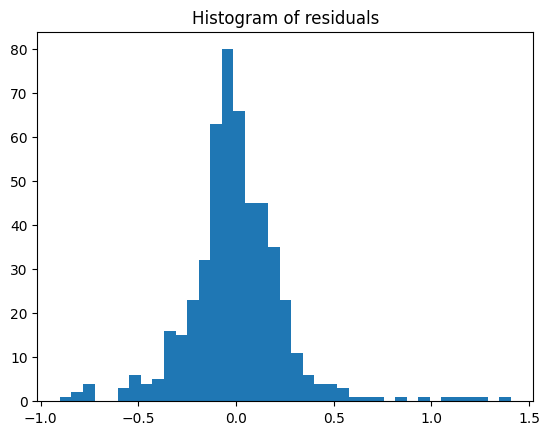

In [47]:
X = df[['crime', 'lnox', 'rooms', 'lproptax']]
y = df['lprice']

X = sm.add_constant(X)

model = sm.OLS(y, X)
results11 = model.fit()
print(results11.summary())

plt.hist(results11.resid, bins='auto')
plt.title('Histogram of residuals')
plt.show()

The OLS regression results show that all the variables (crime, lnox, rooms, lproptax) are statistically significant to lprice variation as their p-values are less than 0.05.

The coefficients indicate that the price is negatively correlated with crime, lnox, and lproptax, and positively correlated with rooms.

The histogram of residuals follows a normal distribution. It suggests that the linear regression model might fit for this data.

The R-squared is a little bit higher than the previous model, which means that this model fits better than the previous one.

**12. In the specification of question 10, test the hypothesis $H_0:\beta_{\text{nox}} <0$ vs. $H_1: \beta_{\text{nox}} > 0$ at the 1% level**


In [48]:
p_value = results10.pvalues['nox']
alpha = 0.01

print('p_value = ', p_value)

if p_value < alpha:
    print("We reject the null hypothesis at the 1% level.")
else:
    print("We do not reject the null hypothesis at the 1% level.")

p_value =  0.0004106959052589233
We reject the null hypothesis at the 1% level.


**13.  In the specification of question 10, test the hypothesis $H_0:\beta_{\text{nox}} = 0$ vs. $H_1: \beta_{\text{nox}} \neq 0$ at the 1% level using the p-value of the test**


In [49]:
p_value = results10.pvalues['nox']
alpha = 0.01

print('p_value = ', p_value)

if p_value < alpha/2:
    print("We reject the null hypothesis at the 1% level.")
else:
    print("We do not reject the null hypothesis at the 1% level.")

p_value =  0.0004106959052589233
We reject the null hypothesis at the 1% level.


**14.  In the specification of question 10, test the hypothesis $H_0: \beta_{\text{crime}} = \beta_{\text{proptax}}$ at the 10% level**

In [50]:
# Model: 
# lprice = beta0 + beta1 * crime + beta2 * nox + beta3 * rooms + beta4 * proptax + u
# theta = beta1 - beta4
# H0: theta = 0
# H1: theta != 0
# 
# beta1 = theta + beta4
# lprice = beta0 + (theta + beta4) * crime + beta2 * nox + beta3 * rooms + beta4 * proptax + u
# lprice = beta0 + theta * crime + beta2 * nox + beta3 * rooms + beta4 * (crime + proptax) + u

# Creating new variable: 
# crime_tax = crime + proptax

X = df[['crime', 'nox', 'rooms']].copy()
X['crime_tax'] = X['crime'] + df['proptax']
X = sm.add_constant(X)

y = df['lprice']

model = sm.OLS(y, X)
results14 = model.fit()

# Hypothesis test:
# t = theta / se(theta)
t_stat = results14.params['crime'] / results14.bse['crime']

alpha = 0.1
ndf = len(y) - len(results14.params) - 1 # number of degrees of freedom
critical_value = t.ppf(alpha/2, df=ndf) # two sided 

print('Critical value:', critical_value)
print('t-stat:', t_stat)

if abs(t_stat) > critical_value:
  print("We reject the null hypothesis at the", alpha*100, "% level.")
else:
  print("We do not reject the null hypothesis at the", alpha*100, "% level.")


Critical value: -1.6479068539295052
t-stat: -3.6235808366097197
We reject the null hypothesis at the 10.0 % level.


**15. In the specification of question 10, test the hypothesis $H_0: \beta_{\text{nox}} = 0, \, \beta_{\text{proptax}} = 0$ at the 10% level**
    

In [51]:
x_unrestricted = sm.add_constant(df[['crime', 'nox', 'rooms', 'proptax']])
x_restricted = sm.add_constant(df[['crime', 'rooms']])

y = df['lprice']

model_unrestricted = sm.OLS(y, x_unrestricted)
model_restricted = sm.OLS(y, x_restricted)

results_unrestricted = model_unrestricted.fit()
results_restricted = model_restricted.fit()

# Hypothesis test:

SSR_unrestricted = results_unrestricted.ssr
SSR_restricted = results_restricted.ssr

k_unrestricted = x_unrestricted.shape[1] - 1
k_restricted = x_restricted.shape[1] - 1
q = k_unrestricted - k_restricted  # numerator degrees of freedom

n = len(y)
ddf = n - k_unrestricted - 1  # denominator degrees of freedom

F_statistic = ((SSR_restricted - SSR_unrestricted) / q) / \
    (SSR_unrestricted / ddf)


alpha = 0.10  # 10% significance level
critical_value = f.ppf(1 - alpha, q, ddf)

print(f'F Statistic: {F_statistic}')
print(f'Critical Value: {critical_value}')

if F_statistic > critical_value:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

F Statistic: 33.348835962831544
Critical Value: 2.3132002236303255
Reject the null hypothesis


**16.  In the specification of question 10, test the hypothesis $H_0: \beta_{\text{nox}} = -500, \, \beta_{\text{proptax}} = -100$ at the 10% level using the p-value of the test**

In [52]:
# Unrestricted model: 
# lprice = beta0 + beta1 * crime + beta2 * nox + beta3 * rooms + beta4 * proptax + u
# 
# Restricted model:
# lprice - beta2 * nox - beta4 * proptax = beta0 + beta1 * crime + beta3 * rooms
# beta2 = -500; beta4 = -100; so:
# lprice + 500 * nox + 100 * proptax = beta0 + beta1 * crime + beta3 * rooms

x_unrestricted = sm.add_constant(df[['crime', 'nox', 'rooms', 'proptax']])
x_restricted = sm.add_constant(df[['crime', 'rooms']])

y_unrestricted = df['lprice']
y_restricted = df['lprice'] + 500 * df['nox'] + 100 * df['proptax']

model_unrestricted = sm.OLS(y_unrestricted, x_unrestricted)
model_restricted = sm.OLS(y_restricted, x_restricted)

results_unrestricted = model_unrestricted.fit()
results_restricted = model_restricted.fit()

# Hypothesis test:
SSR_unrestricted = results_unrestricted.ssr
SSR_restricted = results_restricted.ssr

k_unrestricted = x_unrestricted.shape[1] - 1
k_restricted = x_restricted.shape[1] - 1

q = k_unrestricted - k_restricted  # numerator degrees of freedom

n = len(y)
ddf = n - k_unrestricted - 1  # denominator degrees of freedom

F_statistic = ((SSR_restricted - SSR_unrestricted) / q) / \
    (SSR_unrestricted / ddf)


alpha = 0.10  # 10% significance level
critical_value = f.ppf(1 - alpha, q, ddf)

print(f'F Statistic: {F_statistic}')
print(f'Critical Value: {critical_value}')

if F_statistic > critical_value:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

F Statistic: 10798305112.262833
Critical Value: 2.3132002236303255
Reject the null hypothesis


**17. In the specification of question 10, test the hypothesis $H_0: \beta_{\text{nox}} + \beta_{\text{proptax}} = -1000$ at the 10% level using the p-value of the test**

In [53]:
# Model: 
# lprice = beta0 + beta1 * crime + beta2 * nox + beta3 * rooms + beta4 * proptax + u
# theta = beta1 + beta4
# H0: theta = -1000
# H1: theta != -1000
# 
# beta1 =  theta - beta4
# lprice = beta0 + (theta - beta4) * crime + beta2 * nox + beta3 * rooms + beta4 * proptax + u
# lprice = beta0 + theta * crime + beta2 * nox + beta3 * rooms + beta4 * (crime - proptax) + u

# Creating new variable: 
# crime_tax = crime + proptax

X = df[['crime', 'nox', 'rooms']].copy()
X['crime_tax'] = X['crime'] - df['proptax']
X = sm.add_constant(X)

y = df['lprice']

model = sm.OLS(y, X)
results14 = model.fit()

# Hypothesis test:
# H0: b_j = a_j  => theta = -1000
# t = (b_j - a_j)   / se(b_j)
# t = (theta + 1000) / se(theta)

beta_1 = results14.params['crime']
t_stat = (beta_1 + 1000) / results14.bse['crime']

alpha = 0.1
ndf = len(y) - len(results14.params) - 1 # number of degrees of freedom
critical_value = t.ppf(alpha/2, df=ndf) # two sided 

print('Critical value:', critical_value)
print('t-stat:', t_stat)

if abs(t_stat) > critical_value:
  print("We reject the null hypothesis at the", alpha*100, "% level.")
else:
  print("We do not reject the null hypothesis at the", alpha*100, "% level.")


Critical value: -1.6479068539295052
t-stat: 665984.3136755038
We reject the null hypothesis at the 10.0 % level.


**18. In the specification of question 10, test the hypothesis that all coefficients are the same for observations with low levels of nox vs. medium and high levels of nox.**

In [54]:
# Test that all coefficients are the same for observations with low leves of nox x medium levels of nox and high levels of nox

# First step: estimate the coefficient for low levels of nox
x_unrestricted = df[df['nox_level'] == 'low'][[
    'crime', 'nox', 'rooms', 'proptax']]
x_unrestricted = sm.add_constant(x_unrestricted)

y_unrestricted = df[df['nox_level'] == 'low']['lprice']

model = sm.OLS(y_unrestricted, x_unrestricted)
results_unrestricted = model.fit()

# Now we know the coefficients and we can make the hypothesis test for medium and high levels of nox
# H_0: b_i_low = b_i_high_medium \forall i
# H_1: b_i_low != b_i_high_medium \exists i

# Unrestricted model:
# lprice = beta0 + beta1 * crime + beta2 * nox + beta3 * rooms + beta4 * proptax + u
#
# Restricted model:
# lprice - beta1 * crime - beta2 * nox - beta3 * rooms - beta4 * proptax + = beta0 + u
# where beta_n is the result of the unrestricted model


x_medium_high = df[df['nox_level'] != 'low'][[
    'crime', 'nox', 'rooms', 'proptax']]
y_medium_high = df[df['nox_level'] != 'low']['lprice']

x_restricted = sm.add_constant(x_medium_high)[
    ['const']]  # Only the constant goes here
y_restricted = y_medium_high - results_unrestricted.params['crime'] * x_medium_high['crime'] \
    - results_unrestricted.params['nox'] * x_medium_high['nox']\
    - results_unrestricted.params['rooms'] * x_medium_high['rooms'] \
    - results_unrestricted.params['proptax'] * x_medium_high['proptax']

model_restricted = sm.OLS(y_restricted, x_restricted)
results_restricted = model_restricted.fit()

# Hypothesis test:
SSR_unrestricted = results_unrestricted.ssr
SSR_restricted = results_restricted.ssr

k_unrestricted = x_unrestricted.shape[1] - 1
k_restricted = x_restricted.shape[1] - 1

q = k_unrestricted - k_restricted  # numerator degrees of freedom

n = len(y)
ddf = n - k_unrestricted - 1  # denominator degrees of freedom

F_statistic = ((SSR_restricted - SSR_unrestricted) / q) / \
    (SSR_unrestricted / ddf)


alpha = 0.10  # 10% significance level
critical_value = f.ppf(1 - alpha, q, ddf)

print(f'F Statistic: {F_statistic}')
print(f'Critical Value: {critical_value}')

if F_statistic > critical_value:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

F Statistic: 37988.17576773106
Critical Value: 1.9561124604463698
Reject the null hypothesis


**19. Repeat the test of question 18 but now assuming that only the coefficients of nox and
proptax can change between the two groups of observations. State and test $H_0$.**

In [55]:
#
# Now we know the coefficients and we can make the hypothesis test for medium and high levels of nox
# H_0: b_i_low = b_i_high_medium \forall i in {2,4}
# H_1: b_i_low != b_i_high_medium \exists i in {2,4}

# Unrestricted model:
# lprice = beta0 + beta1 * crime + beta2 * nox + beta3 * rooms + beta4 * proptax + u
#
# Restricted model:
# lprice - beta2 * nox - beta4 * proptax = beta0 + beta1 * crime + beta3 * rooms + u
# where beta_2 and beta_4 are the result of the unrestricted model

# First step: estimate the coefficient for low levels of nox
x_unrestricted = df[df['nox_level'] == 'low'][[
    'crime', 'nox', 'rooms', 'proptax']]
x_unrestricted = sm.add_constant(x_unrestricted)

y_unrestricted = df[df['nox_level'] == 'low']['lprice']

model = sm.OLS(y_unrestricted, x_unrestricted)
results_unrestricted = model.fit()

# Second step: estimate the restricted model for medium and high levels of nox

x_medium_high = df[df['nox_level'] != 'low'][[
    'crime', 'nox', 'rooms', 'proptax']]
x_restricted = x_medium_high[['crime', 'rooms']]
x_restricted = sm.add_constant(x_restricted)

y_medium_high = df[df['nox_level'] != 'low']['lprice']
y_restricted = y_medium_high - results_unrestricted.params['nox'] * x_medium_high['nox']\
    - results_unrestricted.params['proptax'] * x_medium_high['proptax']

model_restricted = sm.OLS(y_restricted, x_restricted)
results_restricted = model_restricted.fit()

# Hypothesis test:
SSR_unrestricted = results_unrestricted.ssr
SSR_restricted = results_restricted.ssr

k_unrestricted = x_unrestricted.shape[1] - 1
k_restricted = x_restricted.shape[1] - 1

q = k_unrestricted - k_restricted  # numerator degrees of freedom

n = len(y)
ddf = n - k_unrestricted - 1  # denominator degrees of freedom

F_statistic = ((SSR_restricted - SSR_unrestricted) / q) / \
    (SSR_unrestricted / ddf)


alpha = 0.10  # 10% significance level
critical_value = f.ppf(1 - alpha, q, ddf)

print(f'F Statistic: {F_statistic}')
print(f'Critical Value: {critical_value}')

if F_statistic > critical_value:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

F Statistic: 6926.010531682471
Critical Value: 2.3132002236303255
Reject the null hypothesis


#### PART 2 - HETEROSKEDASTICITY

**20. Explain the problem of heteroskedasticity with an example of the course.**

The Heteroskedasticity problem arises when $Var(u|x)$ depends on $x$, indicating nonconstant variance. Since $Var(u|x) = Var(y|x)$, heteroskedasticity is present whenever $Var(y|x)$ is a function of $x$.

We can visualize this problem with the example provided in the course, where we examine the relationship between education and wage. If, when creating the model, we assume homoskedasticity—that is, the variance of the error term is constant across all levels of education—we will encounter a problem. This is because when we analyze the real world, we can imagine that when a person has a higher education level, they will have more and distinct opportunities for work, and therefore, their wage will be more variable. On the other hand, a person with a lower education level will have fewer opportunities for work, and therefore, their wage will be less variable.

Therefore, we can conclude that if we assume homoskedasticity, we will introduce bias into our model.

**21. Suppose that $E(u u') = \sigma^2\Omega$. Show that the GLS estimator is the best linear unbiased estimator.**

Lets start by defining $\Omega$:
$$
\Omega = \begin{bmatrix}
h_1 & 0 & \cdots & 0 \\
0 & h_2 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & h_n
\end{bmatrix}
$$

Where $h(\boldsymbol{x})$ is some function of the explanatory variables that determines the heteroskedasticity. 
Then, we can define:

$$
\sigma_i^2 = Var(u_i| \boldsymbol{x}_i) = \sigma^2 h(\boldsymbol{x}_i) = \sigma^2 h_i
$$
Where $\boldsymbol{x}_i$ is all independent variables for observation $i$.

Since variances must be positive, $h_i > 0$ for all possible values of the independent variables.

Considering the model which contains heteroskedastic errors:
$$
y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + ... + \beta_{k} x_{ik} + u_i
$$
Dividing both sides by $\sqrt{h_i}$, we obtain:
$$
\frac{y_i}{\sqrt{h_i}} = \frac{\beta_0}{\sqrt{h_i}} + \frac{\beta_1 x_{i1}}{\sqrt{h_i}} + \frac{\beta_2 x_{i2}}{\sqrt{h_i}} + ... + \frac{\beta_{k} x_{ik}}{\sqrt{h_i}} + \frac{u_i}{\sqrt{h_i}}
$$
or
$$
y_i^* = \beta_0^* + \beta_1^* x_{i1} + \beta_2^* x_{i2} + ... + \beta_{k}^* x_{ik} + u_i^*
$$
where $y_i^* = \frac{y_i}{\sqrt{h_i}}$, $\beta_j^* = \frac{\beta_j}{\sqrt{h_i}}$ and $u_i^* = \frac{u_i}{\sqrt{h_i}}$.


$$
E \left( (u_i/h_i)^2 \right) = E (u_i^2)/h_i^2 = (\sigma^2h_i)/h_i = \sigma^2
$$

So now we have a model that the variance of the error term is constant and we don't have heteroskedasticity. This equation is linear in its parameters. Further, $u^*$ has a zero mean and a constant variance $\sigma^2$, conditional on $x^*$. This means that if the original equation satisfies the first four Gauss-Markov assumptions, then this transformed equation satisfies all five Gauss-Markov assumptions. Also, if $u_i$ has a normal distribution, then $u^*$ has a normal distribution with variance $\sigma^2$. Therefore, the transformed equation satisfies the classical linear model assumptions.








**22.  In the specification of question 9, test the hypothesis of no heteroskedasticity of linear form, i.e. in the regression of $u^2$ on constant, crime, nox, rooms, proptax, test $H_0: \delta_{\text{crime}}, \delta_{\text{nox}}, \delta_{\text{rooms}}, \delta_{\text{proptax}} = 0$, where the coefficients $\delta_k$ (k = crime, nox, rooms, proptax) are associated with the corresponding explanatory variables.**


In [56]:
x_22 = df[['crime', 'nox', 'rooms', 'proptax']]
x_22 = sm.add_constant(x_22)

u = results9.resid
u2 = u**2
y_22 = u2
model = sm.OLS(y_22, x_22)
results22 = model.fit()

f_statistic = results22.fvalue

alpha = 0.1
k = len(results22.params) - 1
n = len(y_22)
ddf = n - k - 1

critical_value = f.ppf(1 - alpha, dfn=k, dfd=ddf)

print('critical_value = ', critical_value)
print('f_statistic = ', f_statistic)

if (f_statistic > critical_value):
    print("We reject the null hypothesis at the 1% level.")
else:
    print("We do not reject the null hypothesis at the 1% level.")

critical_value =  1.9561124604463698
f_statistic =  6.798893253091291
We reject the null hypothesis at the 1% level.


**23. In the specification of question 10, test the hypothesis of no heteroskedasticity of linear form**


In [57]:
X = df[['crime', 'nox', 'rooms', 'proptax']]

X = sm.add_constant(X)

u = results10.resid
u2 = u**2
y = u2
model = sm.OLS(y, X)
results = model.fit()

f_statistic = results.fvalue

alpha = 0.1
k = len(results.params) - 1
n = len(y)
ddf = n - k - 1

critical_value = f.ppf(1 - alpha, dfn=k, dfd=ddf)

print('critical_value = ', critical_value)
print('f_statistic = ', f_statistic)

if (f_statistic > critical_value):
    print("We reject the null hypothesis at the 1% level.")
else:
    print("We do not reject the null hypothesis at the 1% level.")

critical_value =  1.9561124604463698
f_statistic =  17.97638257131299
We reject the null hypothesis at the 1% level.


**24. In the specification of question 11, test the hypothesis of no heteroskedasticity of linear form**


In [58]:
X = df[['crime', 'nox', 'rooms', 'proptax']]

X = sm.add_constant(X)

u = results11.resid
u2 = u**2
y = u2
model = sm.OLS(y, X)
results = model.fit()

f_statistic = results.fvalue

alpha = 0.1
k = len(results.params) - 1
n = len(y)
ddf = n - k - 1

critical_value = f.ppf(1 - alpha, dfn=k, dfd=ddf)

print('critical_value = ', critical_value)
print('f_statistic = ', f_statistic)

if (f_statistic > critical_value):
    print("We reject the null hypothesis at the 1% level.")
else:
    print("We do not reject the null hypothesis at the 1% level.")

critical_value =  1.9561124604463698
f_statistic =  18.273266849414032
We reject the null hypothesis at the 1% level.


  **25. Comment on the differences between your results of questions 22,23, 24.**


In all three tests, the null hypothesis is rejected, indicating the presence of heteroskedasticity. However, an increase in the F-statistic is noticeable when comparing the tests. In the first test, the F-value is 6.799; in the second, F is 19.98; and in the third, F is 18.27. The increment in the F-value is noteworthy because as it increases, it moves further away from the critical value, which remains constant at 1.95 for all tests. Therefore, it can be concluded that as the F-value rises, we gain more certainty about the presence of heteroskedasticity.

**26. Regardless of the results of the test of question 22, identify the most significant variable causing heteroskedasticity using the student statistics and run a WLS regression with the identified variable as weight.**

In [59]:
# Considering alpha = 0.1:

alpha = 0.1
print('='*50)
print('Variables causing heteroskedasticity:')
for i, coef in enumerate(results22.params.index):
  p_value = results22.pvalues[i]
  if p_value < alpha:
    print(f"{coef}: p-value = {p_value}")
print('='*50)

weights = 1/(results22.fittedvalues**2)

wls_model = sm.WLS(y_9,x_22, weights=weights)
wls_results = wls_model.fit()

print(wls_results.summary())

Variables causing heteroskedasticity:
proptax: p-value = 9.65606596552974e-05
                            WLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.894
Model:                            WLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     1053.
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          3.07e-242
Time:                        21:12:21   Log-Likelihood:                -5452.0
No. Observations:                 506   AIC:                         1.091e+04
Df Residuals:                     501   BIC:                         1.094e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

In [60]:
print(results9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     169.6
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           1.06e-91
Time:                        21:12:21   Log-Likelihood:                -5119.6
No. Observations:                 506   AIC:                         1.025e+04
Df Residuals:                     501   BIC:                         1.027e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.868e+04   3215.205     -5.811      0.0

We can see an improvement in the R-squared value when we use the WLS regression. This indicates that the model fits better when we use the weights.

---

#### PART 3 - TIMES SERIES DATA

**This part uses the threecenturies_v2.3 datasets. Import Real GDP at market prices, unemployment
rate and consumer price inflation for the period 1900-2000 in Python from the A1 worksheet.**

In [61]:
df3 = pd.read_excel('threecenturies_v2.3.xlsx', sheet_name='A1. Headline series', header=3)

df3 = df3.drop(df3.index[:3]).reset_index(drop=True)

df3 = df3[['Description', 'Real GDP at market prices', 'Unemployment rate', 'Consumer price inflation']]

df3.columns = ['Year', 'Real GDP', 'Unemployment Rate', 'Inflation']

df3 = df3[(df3['Year'] >= 1900) & (df3['Year'] <= 2000)].reset_index(drop=True)

df3


,Year,Real GDP,Unemployment Rate,Inflation
0,1900,181160.264436,3.679865,4.058273
1,1901,184974.529384,4.877351,-0.3
2,1902,187756.550527,5.145694,0
3,1903,186015.76815,5.603507,1.10331
4,1904,188155.559259,6.914821,-0.396825
...,...,...,...,...
96,1996,1243709,8.097052,2.400308
97,1997,1282602,6.972014,1.824606
98,1998,1323527,6.255467,1.557398
99,1999,1366983,5.976813,1.32871


**27. Define strict and weak stationarity.**

Stationarity in time series refers to a condition where a set of statistical properties remains constant over time. There are two concepts within stationarity: weak stationarity and strict stationarity.

Weak stationarity requires that only the mean and the variance remain constant over time and that the covariance between two time points only depends on the lag between the time points and not on the specific points in time, while the strict stationarity requires that the entire joint distribution  remains invariant over time.

**28. Explain ergodicity and state the ergodic theorem. Illustrate with an example.**

Ergodicity referes to the property of a process where it forgets its initial condition and its long-term behavior becomes independent of its initial conditions.

The ergodic theorem states that the temporal average converges to the spatial average (the expectation) if a process is both stationary and ergodic.

An example of an ergodic process is flipping a fair coin multiple times over time. Due to its two sides, the long-term average aligns with the theoretical probability. 

**29. Why do we need both stationarity and ergodicity?**

As the ergodic theorem states, if a process is both stationary and ergodic, we can estimate its statistical properties accurately without needind to know its initial conditions.

**30. Explain “spurious regression”.**

Spurious regression is a statistical issue where regression analysis falsely suggests a relationship between unrelated time series processes. This can result in incorrect assumptions about causal relationships between these processes when, in fact, there is none.

**31. Define a moving average and explain the trade-off involved in the choice of the size of the
window and of whether to center or not the moving average.**

The moving average is a statistical technique employed for temporal data analysis, smoothing random fluctuations and accentuating significant trends or patterns. It involves averaging a series of consecutive observations within a sliding window.

The choice of the window size introduces a trade-off. A smaller window can capture short-term variations but may be sensitive to random fluctuations. On the other hand, a larger window smoothens more fluctuations but may overlook crucial short-term details and could be slower to adapt to changes.

Similarly, the decision to center or not the moving average presents another trade-off. Centering entails calculating the average in the middle of the window, reducing lag in trend change detection but potentially introducing a lagging effect in representing the current trend. Opting for a non-centered moving average means calculating the average at the window's end, resulting in a swifter response to changes but potentially introducing more lag in representing the central trend.

**32. Make all time series stationary by computing the difference between the original variable
and a moving average of order 10.**

In [62]:
stationary10_df3 = df3.copy()
window_size = 10

for column in stationary10_df3.columns:
    if column != 'Year':
        stationary10_df3[column] = df3[column] - df3[column].rolling(window_size).mean()

stationary10_df3.fillna(0, inplace=True)

stationary10_df3

,Year,Real GDP,Unemployment Rate,Inflation
0,1900,0.0,0.000000,0.000000
1,1901,0.0,0.000000,0.000000
2,1902,0.0,0.000000,0.000000
3,1903,0.0,0.000000,0.000000
4,1904,0.0,0.000000,0.000000
...,...,...,...,...
96,1996,110126.0,-0.771393,-1.650728
97,1997,123193.4,-1.550303,-2.088396
98,1998,140128.6,-2.034953,-2.135426
99,1999,158048.1,-2.189149,-1.973224


**33. Compute the difference between the resulting time series of question 32 and a moving
average of order 5. Give the exact formula for the weights after the two transformations.**

In [81]:
stationary5_df3 = df3.copy()
window_size = 5

for column in df3.columns:
    if column != 'Year':
        stationary5_df3[column] = df3[column] - df3[column].rolling(window_size).mean()

stationary5_df3.fillna(0, inplace=True)

stationary_diff_df3 = stationary10_df3.copy()

for column in stationary_diff_df3.columns:
    if column != 'Year':
        stationary_diff_df3[column] = stationary10_df3[column] - stationary5_df3[column]

stationary_diff_df3

,Year,Real GDP,Unemployment Rate,Inflation
0,1900,0.000000,0.000000,0.000000
1,1901,0.000000,0.000000,0.000000
2,1902,0.000000,0.000000,0.000000
3,1903,0.000000,0.000000,0.000000
4,1904,-2543.024907,-1.670574,1.289777
...,...,...,...,...
96,1996,44335.200000,0.439479,-1.290377
97,1997,52821.400000,0.190024,-1.639731
98,1998,65757.600000,-0.401936,-1.609372
99,1999,76988.900000,-0.981335,-1.348440


<div style="background-color: red; padding: 10px;">

* Responder sobre os weights

</div>

**34. Using the original dataset, test the unit root hypothesis for all variables.**

<div style="background-color: red; padding: 10px;">

* Usar a biblioteca ou codar o teste?

* Melhorar as conclusões
</div>


The unit root test is used to determine whether a time series dataset is non-stationary or stationary. The most commonly used unit root test is the Dickey-Fuller test, where if the null hypothesis is rejected it suggests that the time series is non-stationary. Conversely, if the null hypothesis is rejected, it indicates that the time series is stationary.

In [79]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller


results_list = []

for column in df3.columns[1:]:
    variable = column
    adf_result = adfuller(df3[column], maxlag=0, regression='ct', autolag=None)
    adf_statistic = adf_result[0]
    p_value = adf_result[1]
    reject_null_hypothesis = p_value < 0.01

    results_list.append({'Variable': variable,
                         'ADF Statistic': adf_statistic,
                         'p-value': p_value,
                         'Reject Null Hypothesis': reject_null_hypothesis})

results_table = pd.DataFrame(results_list)

results_table

,Variable,ADF Statistic,p-value,Reject Null Hypothesis
0,Real GDP,1.611740,1.000000,False
1,Unemployment Rate,-2.026906,0.586704,False
2,Inflation,-3.715418,0.021362,False


The results of the Augmented Dickey-Fuller (ADF) test conducted on the 'Real GDP' data from the original dataset indicate a non-stationary nature of this variable. This inference is drawn from the statistical value obtained, which exceeds all critical values, suggesting a lack of stationarity in the time series.

Performing the same test on 'Unemployment Rate', the results also indicate a non-stationary nature of this variable. In this case, again, the statiscal value obtained exceeds all critical values.

Differently from the previous results, this one indicates a stationary nature for 'Inflation', since the statistical value obtained is less than all critical values.

**35. Transform all variables so that they are stationary using either your answers to questions 32-
33 or to question 34.**

In [78]:
results_list = []

stationary_df = df3.copy().diff().dropna()

for column in stationary_df.columns[1:]:
    variable = column
    adf_result = adfuller(stationary_df[column], maxlag=0, regression='c', autolag=None)
    adf_statistic = adf_result[0]
    p_value = adf_result[1]
    reject_null_hypothesis = p_value < 0.01

    results_list.append({'Variable': variable,
                         'ADF Statistic': adf_statistic,
                         'p-value': p_value,
                         'Reject Null Hypothesis': reject_null_hypothesis})

results_table = pd.DataFrame(results_list)

results_table

,Variable,ADF Statistic,p-value,Reject Null Hypothesis
0,Real GDP,-4.612330,1.225763e-04,True
1,Unemployment Rate,-8.563655,8.561100e-14,True
2,Inflation,-9.690380,1.140695e-16,True


**36. Explain the difference between ACF and PACF.**

ACF and PACF are statistical tools used in time series analysis to identify the patterns in the data.

ACF measures the correlation between a time series and its lagged values.
It helps in identifying the patterns, such as seasonality or trend, in the data.

PACF measures the correlation between a time series and its lagged values, while taking into account the correlation with the intermediate lagged values.
It helps in identifying the direct effect of past values on the current value, after removing the indirect effects of the intermediate values.

**37. Plot and comment on the ACF and PACF of all variables.**

<div style="background-color: red; padding: 10px;">

* Comentar gráficos

</div>

In [70]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

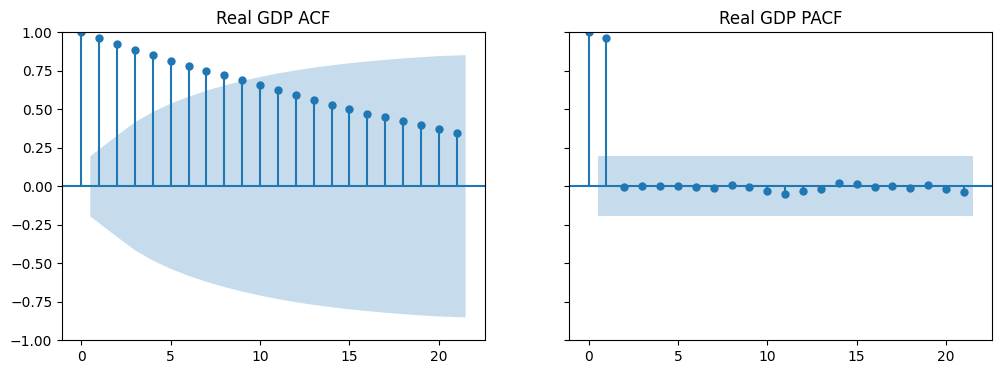

In [71]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

plot_acf(df3['Real GDP'], ax=ax1, title='Real GDP ACF')
plot_pacf(df3['Real GDP'], ax=ax2, title='Real GDP PACF')

plt.show()

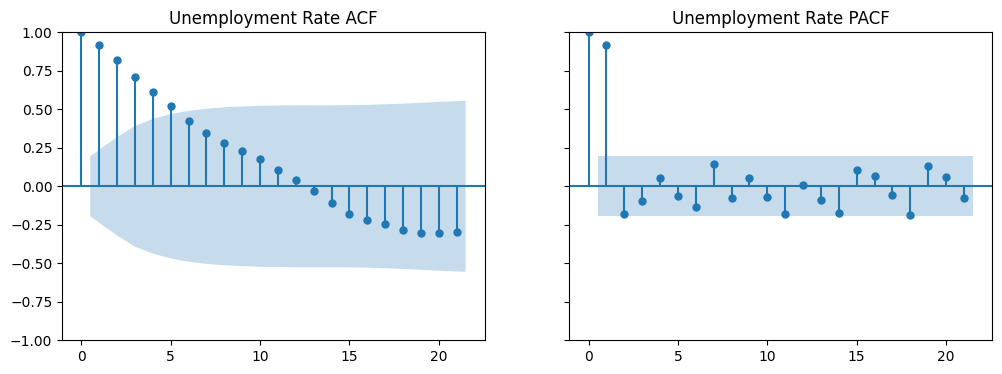

In [72]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

plot_acf(df3['Unemployment Rate'], ax=ax1, title='Unemployment Rate ACF')
plot_pacf(df3['Unemployment Rate'], ax=ax2, title='Unemployment Rate PACF')

plt.show()

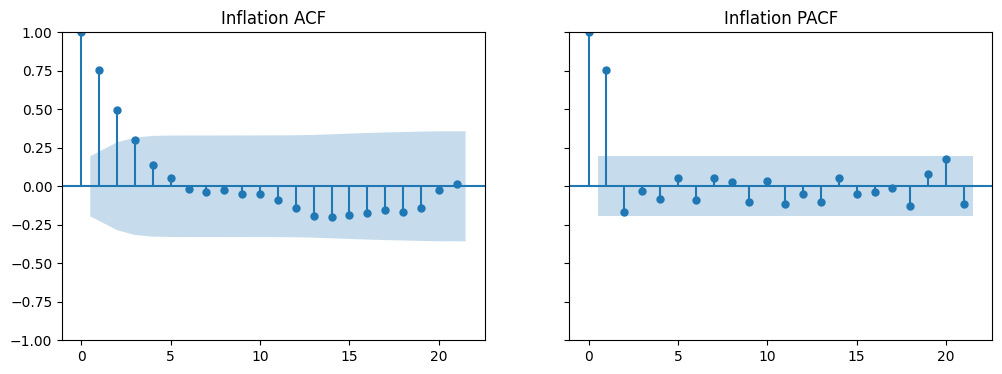

In [73]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

plot_acf(df3['Inflation'], ax=ax1, title='Inflation ACF')
plot_pacf(df3['Inflation'], ax=ax2, title='Inflation PACF')

plt.show()

**38. Explain the principle of parsimony and its relationship with Ockham’s razor using the theory
of information criterion.**

The principle of parsimony, also known as Occam's razor, is a problem-solving principle that states that when analyzing concurrent hypotheses to explain the same phenomenon, the simplest one, or the one that makes the fewest assumptions, should be preferred. This aligns with the theory of information criterion, as it is a method to select the model that best fits the data.

The Akaike information criterion (AIC) and the Bayesian information criterion (BIC), two commonly used information criteria, for example, are based on the principle of parsimony and can be used to compare models with a different number of parameters. They both penalize models with more parameters, which is consistent with the principle of parsimony.

**39. Explain the problem of auto-correlation of the errors.**

Auto-correlation of the errors occurs when the error terms in a regression model are correlated with each other. This means that the error terms in one period are dependent on the error terms in previous periods, which violates the assumption of independence of errors in the regression analysis. 

When error terms exhibit autocorrelation, ordinary least squares encounters challenges. Despite the unbiased nature of estimated regression coefficients, they lose the property of minimum variance. Additionally, the Mean Squared Error (MSE) can notably underestimate the true variance of errors, and the standard error of regression coefficients may substantially underestimate the actual standard deviation. In such situations, traditional statistical intervals and inference procedures are no longer strictly applicable.

**40. Using only stationary variables, run a regression of GDP on constant, unemployment and
inflation and test the hypothesis of no-autocorrelation of errors.**

**41. Regardless of your answer to question 40, correct auto-correlation with GLS. Comment on
the difference with question 40.**

**42. For all variables, construct their lag 1 and lag 2 variables.**

In [74]:

df3_lagged = df3.copy()

df3_lagged.columns = ['Year', 'Real GDP lag 1', 'Real GDP lag 2', 'Unemployment Rate lag 1']
df3_lagged['Real GDP lag 1'] = df3['Real GDP'].shift(1)
df3_lagged['Real GDP lag 2'] = df3['Real GDP'].shift(2)
df3_lagged['Unemployment Rate lag 1'] = df3['Unemployment Rate'].shift(1)
df3_lagged['Unemployment Rate lag 2'] = df3['Unemployment Rate'].shift(2)
df3_lagged['Inflation lag 1'] = df3['Inflation'].shift(1)
df3_lagged['Inflation lag 2'] = df3['Inflation'].shift(2)

df3_lagged

,Year,Real GDP lag 1,Real GDP lag 2,Unemployment Rate lag 1,Unemployment Rate lag 2,Inflation lag 1,Inflation lag 2
0,1900,None,None,None,None,None,None
1,1901,181160.264436,None,3.679865,None,4.058273,None
2,1902,184974.529384,181160.264436,4.877351,3.679865,-0.3,4.058273
3,1903,187756.550527,184974.529384,5.145694,4.877351,0,-0.3
4,1904,186015.76815,187756.550527,5.603507,5.145694,1.10331,0
...,...,...,...,...,...,...,...
96,1996,1212798,1183144,8.621788,9.496097,2.656452,1.97849
97,1997,1243709,1212798,8.097052,8.621788,2.400308,2.656452
98,1998,1282602,1243709,6.972014,8.097052,1.824606,2.400308
99,1999,1323527,1282602,6.255467,6.972014,1.557398,1.824606


**43. Run a regression of GDP on constant, lag 1 unemployment, lag 2 unemployment, lag 1
inflation, lag 2 inflation. What is the number of observations and why?**

**44. State and test the no-Granger causality hypothesis of unemployment on GDP at the 1% level**

**45. Divide the sample in two groups: 1900-1960 and 1961-2000. Test the stability of coefficients between the two periods.**

**46. Test the structural breakpoint using a trim ratio of 30% at the 1% level**